# Business Problem

Blood transfusion saves lives - from replacing lost blood during major surgery or a
serious injury to treating various illnesses and blood disorders. Ensuring that there&#39;s
enough blood in supply whenever needed is a serious challenge for the health
professionals. According to WebMD,&quot;about 5 million Americans need a blood
transfusion every year&quot;. Our dataset is from a mobile blood donation vehicle in Taiwan.
The Blood Transfusion Service Center drives to different universities and collects blood
as part of a blood drive. We want to predict whether or not a donor will give blood the
next time the vehicle comes to campus in March 2007

# Downloading required dependencies 

In [1]:
!pip install imbalanced-learn

# Importing the necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from IPython.display import display

C:\Users\chira\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Reding the dataset

In [3]:
df = pd.read_csv('C:/Users/chira/OneDrive/Desktop/Datamites Internship projects/Blood Donation Prediction/Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv')
df.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


# Basic Checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   576 non-null    int64
 1   Months since Last Donation   576 non-null    int64
 2   Number of Donations          576 non-null    int64
 3   Total Volume Donated (c.c.)  576 non-null    int64
 4   Months since First Donation  576 non-null    int64
 5   Made Donation in March 2007  576 non-null    int64
dtypes: int64(6)
memory usage: 27.1 KB


In [5]:
df.describe()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


In [6]:
# we can drop the unnamed column as it does not serve any purpose to the dataset:

df.drop('Unnamed: 0', axis=1, inplace=True)

df.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Checking for null values

In [7]:
df.isnull().sum()

Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
Made Donation in March 2007    0
dtype: int64

# Exploratory Data Analysis by plotting various graphs

# Correlation between the features

In [8]:
df_corr = df.corr()
df_corr

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
Months since Last Donation,1.000000,-0.159731,-0.159731,0.186899,-0.261234
Number of Donations,-0.159731,1.000000,1.000000,0.622116,0.220615
Total Volume Donated (c.c.),-0.159731,1.000000,1.000000,0.622116,0.220615
Months since First Donation,0.186899,0.622116,0.622116,1.000000,-0.019819
Made Donation in March 2007,-0.261234,0.220615,0.220615,-0.019819,1.000000


# Heatmap

<Axes: >

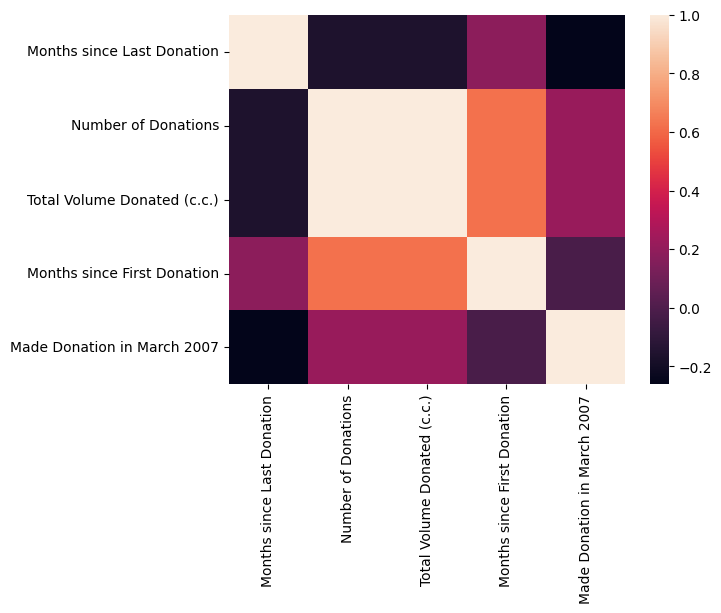

In [9]:
sns.heatmap(df_corr)

# Count Plot for Made donation in March 2007

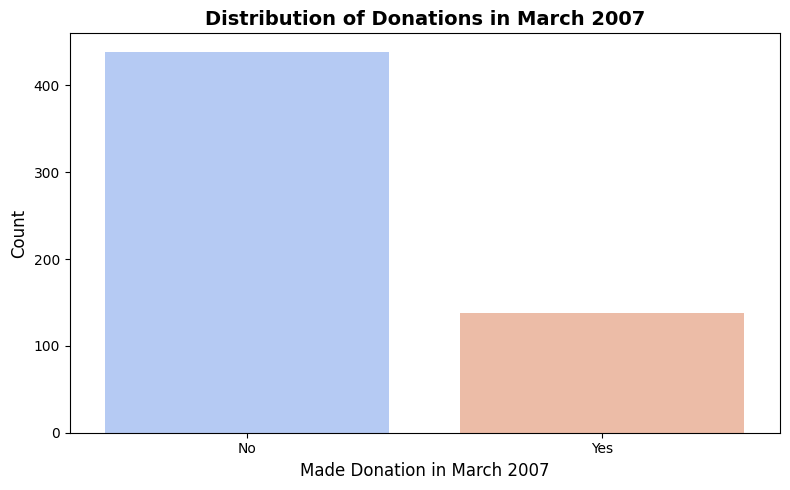

In [10]:
plt.figure(figsize=(8, 5))
fig = sns.countplot(
    data=df, 
    x='Made Donation in March 2007', 
    palette='coolwarm'
)
plt.title('Distribution of Donations in March 2007', fontsize=14, weight='bold')
plt.xlabel('Made Donation in March 2007', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], fontsize=10)
plt.tight_layout()
plt.show()

# Note: We can clearly see that the data is unbalanced

# Box Plot Comparison Between First and Last Donation

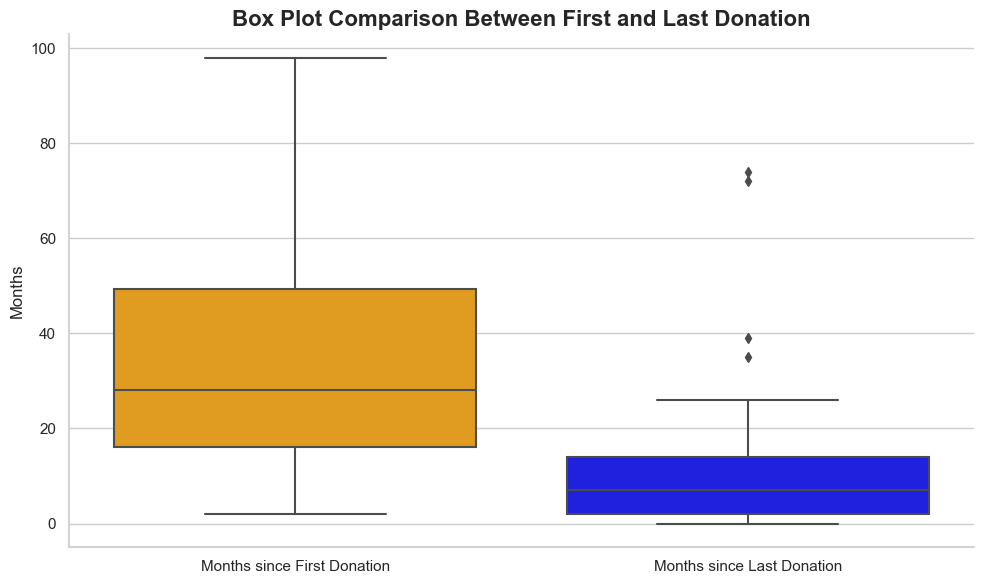

In [11]:
data = df
# Reshape data for grouped boxplot
melted_data = data.melt(
    value_vars=['Months since First Donation', 'Months since Last Donation'],
    var_name='Donation Timeline',
    value_name='Months'
)

# Theme for a professional look
sns.set_theme(style="whitegrid")

# Creating boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    data=melted_data, 
    x='Donation Timeline', 
    y='Months', 
    palette={'Months since First Donation': 'orange', 'Months since Last Donation': 'blue'}
)

# Add title and labels
plt.title('Box Plot Comparison Between First and Last Donation', fontsize=16, weight='bold')
plt.xlabel('')
plt.ylabel('Months', fontsize=12)

# Customize axes and appearance
sns.despine()
plt.tight_layout()

# Show plot
plt.show()


# Boxplots for feature-target relationships

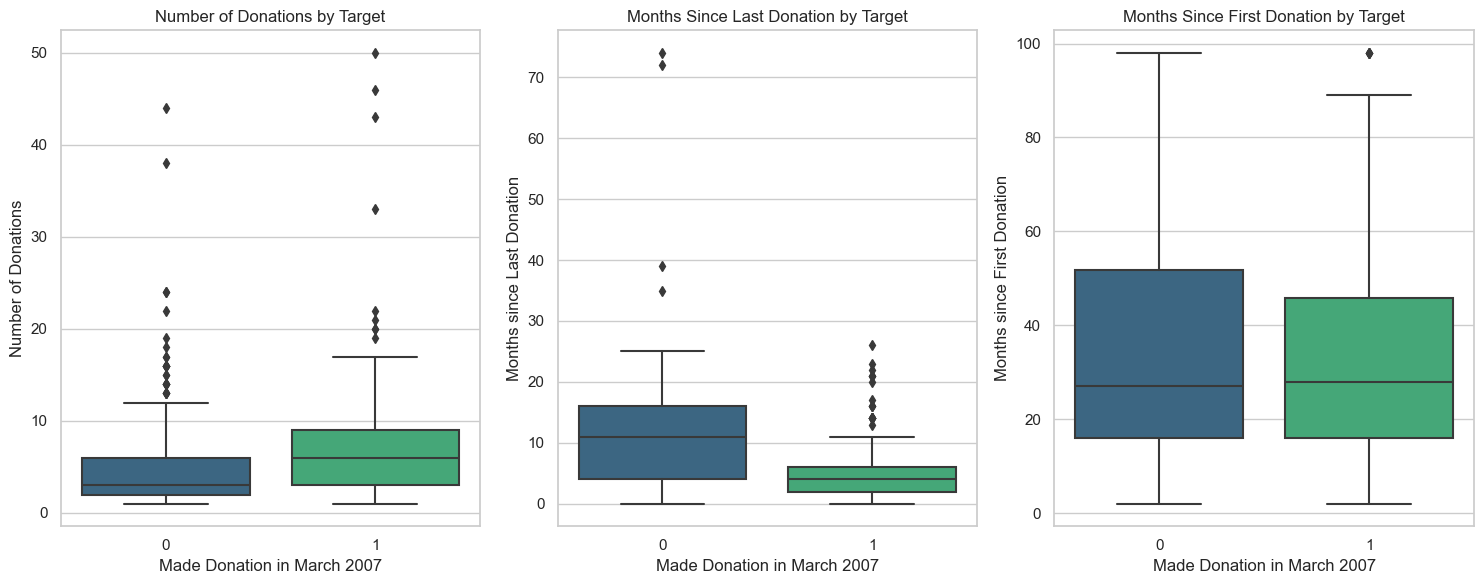

In [12]:
def plot_boxplots():
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 3, 1)
    sns.boxplot(x='Made Donation in March 2007', y='Number of Donations', data=df, palette='viridis')
    plt.title('Number of Donations by Target')

    plt.subplot(1, 3, 2)
    sns.boxplot(x='Made Donation in March 2007', y='Months since Last Donation', data=df, palette='viridis')
    plt.title('Months Since Last Donation by Target')

    plt.subplot(1, 3, 3)
    sns.boxplot(x='Made Donation in March 2007', y='Months since First Donation', data=df, palette='viridis')
    plt.title('Months Since First Donation by Target')

    plt.tight_layout()
    plt.show()

plot_boxplots()

# Scatter plot for Number of Donations vs Months since Last Donation

<Axes: xlabel='Months since Last Donation', ylabel='Number of Donations'>

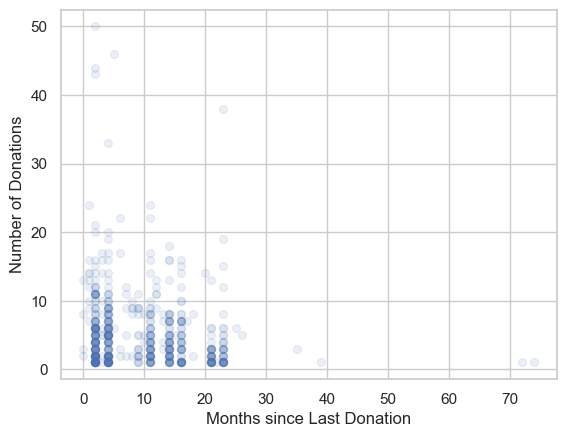

In [13]:
df.plot(kind='scatter', x='Months since Last Donation', y='Number of Donations', s=32, alpha=.10)

# Scatter plot for Months since First Donation vs Number of Donations

<Axes: xlabel='Months since First Donation', ylabel='Number of Donations'>

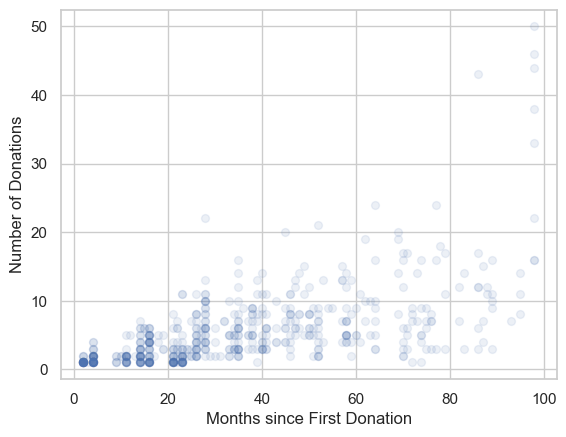

In [14]:
df.plot(kind='scatter', x='Months since First Donation', y='Number of Donations', s=32, alpha=.10)

# Pair Plot


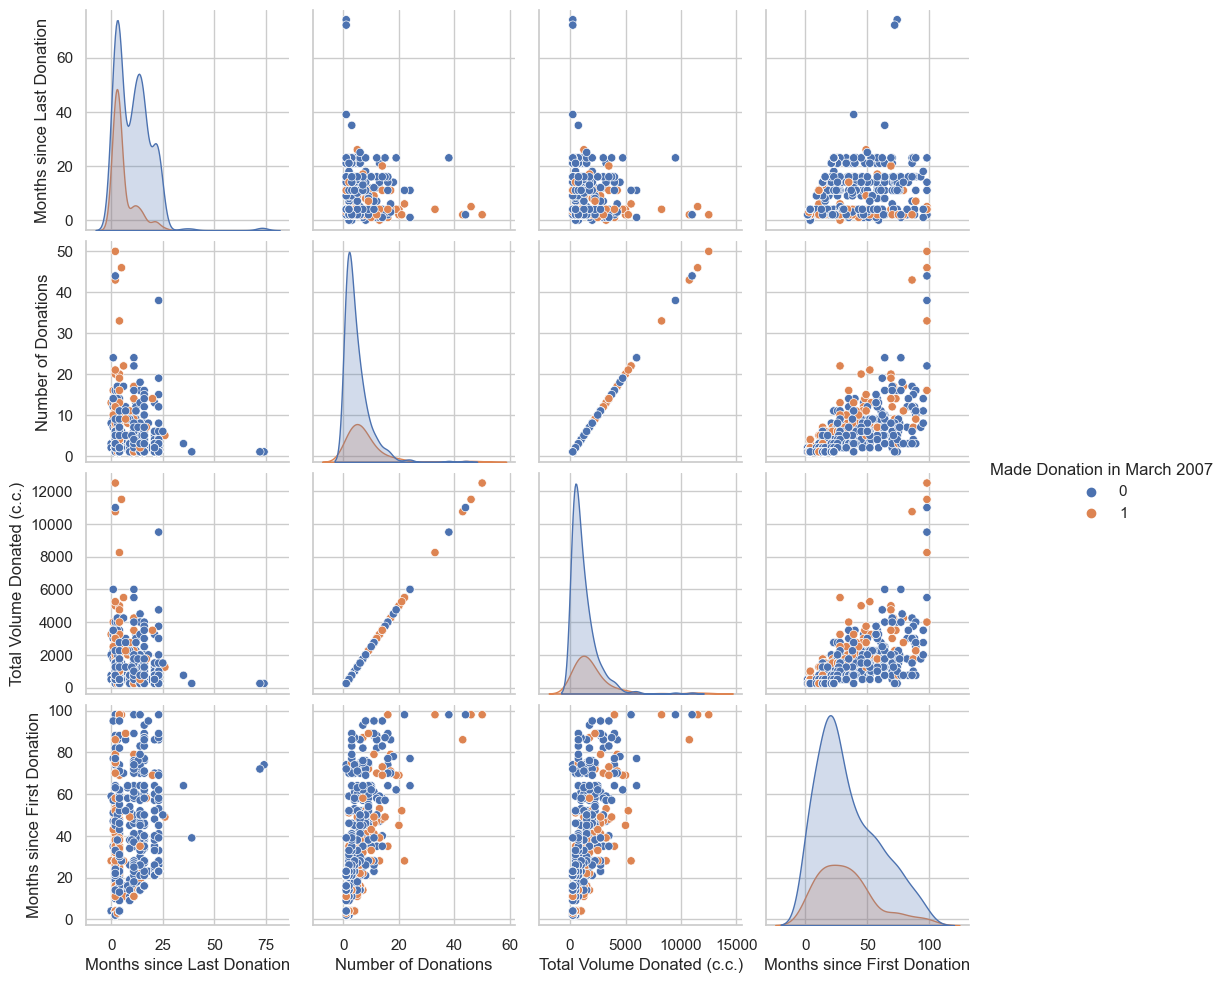

In [15]:
sns.pairplot(df, hue="Made Donation in March 2007")

## Strip plot or a variation of a categorical scatter plot for Number of Donations vs Made Donation in March 2007

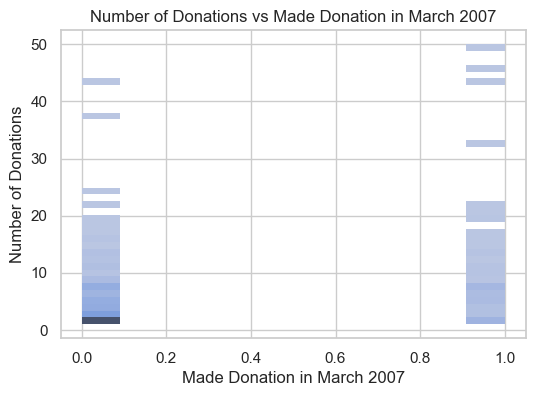

In [16]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Made Donation in March 2007', y='Number of Donations')
plt.title('Number of Donations vs Made Donation in March 2007')
plt.show()

# Join plot between Number of Donations and Total Volume Donated

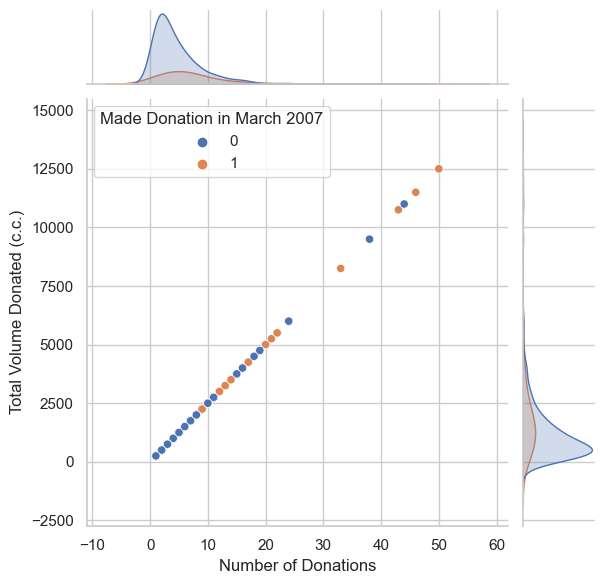

In [17]:
sns.jointplot(x='Number of Donations',y='Total Volume Donated (c.c.)',data=df,hue="Made Donation in March 2007")

## Implementing K-Nearest Neighbors and Naive Bayes model to check accuracy of our model for our dataset

In [18]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/chira/OneDrive/Desktop/Datamites Internship projects/Blood Donation Prediction/Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv')

# Define features and target
X = df.drop('Made Donation in March 2007', axis=1)
y = df['Made Donation in March 2007']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_model.fit(X_train, y_train)

# Predict using the KNN model
knn_preds = knn_model.predict(X_test)

# Compute the accuracy for KNN
accuracy_knn = accuracy_score(y_test, knn_preds)

# Compute F1-scores for KNN
f1_score_0_knn = f1_score(y_test, knn_preds, pos_label=0)
f1_score_1_knn = f1_score(y_test, knn_preds, pos_label=1)

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the Naive Bayes model
nb_model.fit(X_train, y_train)

# Predict using the Naive Bayes model
nb_preds = nb_model.predict(X_test)

# Compute the accuracy for Naive Bayes
accuracy_nb = accuracy_score(y_test, nb_preds)

# Compute F1-scores for Naive Bayes
f1_score_0_nb = f1_score(y_test, nb_preds, pos_label=0)
f1_score_1_nb = f1_score(y_test, nb_preds, pos_label=1)

# Create a DataFrame to display results
results = pd.DataFrame({
    "Model": ["K-Nearest Neighbors", "Naive Bayes"],
    "Accuracy": [accuracy_knn * 100, accuracy_nb * 100],
    "F1-score 0": [f1_score_0_knn * 100, f1_score_0_nb * 100],
    "F1-score 1": [f1_score_1_knn * 100, f1_score_1_nb * 100]
})

# Style the DataFrame for a better display
results_styled = results.style.format({
    "Accuracy": "{:.2f}%",
    "F1-score 0": "{:.2f}%",
    "F1-score 1": "{:.2f}%"
}).set_table_attributes('style="width:50%; border-collapse:collapse; text-align:center;"').set_caption("Model Performance Metrics")

# Display the styled DataFrame
display(results_styled)


,Model,Accuracy,F1-score 0,F1-score 1
0,K-Nearest Neighbors,74.57%,84.06%,37.14%
1,Naive Bayes,77.46%,86.22%,38.10%


## Implementing Random Forest and Decision Tree model to check accuracy of our model for our dataset

In [19]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/chira/OneDrive/Desktop/Datamites Internship projects/Blood Donation Prediction/Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv')

# Define features and target
X = df.drop('Made Donation in March 2007', axis=1)
y = df['Made Donation in March 2007']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=40, max_depth=5)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predict using the Random Forest model
rf_preds = rf_model.predict(X_test)

# Compute the accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, rf_preds)

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Predict using the Decision Tree model
dt_preds = dt_model.predict(X_test)

# Compute the accuracy for Decision Tree
accuracy_dt = accuracy_score(y_test, dt_preds)

# Compute F1-scores for both models
f1_score_0_rf = f1_score(y_test, rf_preds, pos_label=0)
f1_score_1_rf = f1_score(y_test, rf_preds, pos_label=1)

f1_score_0_dt = f1_score(y_test, dt_preds, pos_label=0)
f1_score_1_dt = f1_score(y_test, dt_preds, pos_label=1)

# Create a DataFrame to display results
results = pd.DataFrame({
    "Model": ["Random Forest", "Decision Tree"],
    "Accuracy": [accuracy_rf * 100, accuracy_dt * 100],
    "F1-score 0": [f1_score_0_rf * 100, f1_score_0_dt * 100],
    "F1-score 1": [f1_score_1_rf * 100, f1_score_1_dt * 100]
})

# Style the DataFrame for a better display
results_styled = results.style.format({
    "Accuracy": "{:.2f}%",
    "F1-score 0": "{:.2f}%",
    "F1-score 1": "{:.2f}%"
}).set_table_attributes('style="width:50%; border-collapse:collapse; text-align:center;"').set_caption("Model Performance Metrics")

# Display the styled DataFrame
display(results_styled)


,Model,Accuracy,F1-score 0,F1-score 1
0,Random Forest,77.46%,86.41%,33.90%
1,Decision Tree,67.63%,78.95%,30.00%


## Implementing Logistic Regression and Support Vector Classifier model to check accuracy of our model for our dataset

In [20]:
# Load the dataset
df = pd.read_csv('C:/Users/chira/OneDrive/Desktop/Datamites Internship projects/Blood Donation Prediction/Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv')

# Define features and target
X = df.drop('Made Donation in March 2007', axis=1)
y = df['Made Donation in March 2007']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize models
svc_model = SVC(random_state=42)
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Train and predict with SVC
svc_model.fit(X_train, y_train)
svc_preds = svc_model.predict(X_test)

# Train and predict with Logistic Regression
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Compute accuracy
accuracy_svc = accuracy_score(y_test, svc_preds)
accuracy_lr = accuracy_score(y_test, lr_preds)

# Compute F1-scores for both classes
f1_score_0_svc = f1_score(y_test, svc_preds, pos_label=0)
f1_score_1_svc = f1_score(y_test, svc_preds, pos_label=1)

f1_score_0_lr = f1_score(y_test, lr_preds, pos_label=0)
f1_score_1_lr = f1_score(y_test, lr_preds, pos_label=1)

# Create a DataFrame to display results
results = pd.DataFrame({
    "Model": ["SVC", "Logistic Regression"],
    "Accuracy": [accuracy_svc * 100, accuracy_lr * 100],
    "F1-score 0": [f1_score_0_svc * 100, f1_score_0_lr * 100],
    "F1-score 1": [f1_score_1_svc * 100, f1_score_1_lr * 100]
})

# Style the DataFrame for a better display
results_styled = results.style.format({
    "Accuracy": "{:.2f}%",
    "F1-score 0": "{:.2f}%",
    "F1-score 1": "{:.2f}%"
}).set_table_attributes('style="width:50%; border-collapse:collapse; text-align:center;"').set_caption("Model Performance Metrics")

# Display the styled DataFrame
display(results_styled)

,Model,Accuracy,F1-score 0,F1-score 1
0,SVC,76.30%,86.56%,0.00%
1,Logistic Regression,78.61%,87.29%,32.73%


# Plotting accuracy table for all models

,Model,Accuracy (%),F1-score (Class 0),F1-score (Class 1)
0,KNN,74.57%,84.06%,37.14%
1,Naive Bayes,77.46%,86.22%,38.10%
2,Random Forest,77.46%,86.41%,33.90%
3,Decision Tree,67.63%,78.95%,30.00%
4,SVC,76.30%,86.56%,0.00%
5,Logistic Regression,78.61%,87.29%,32.73%


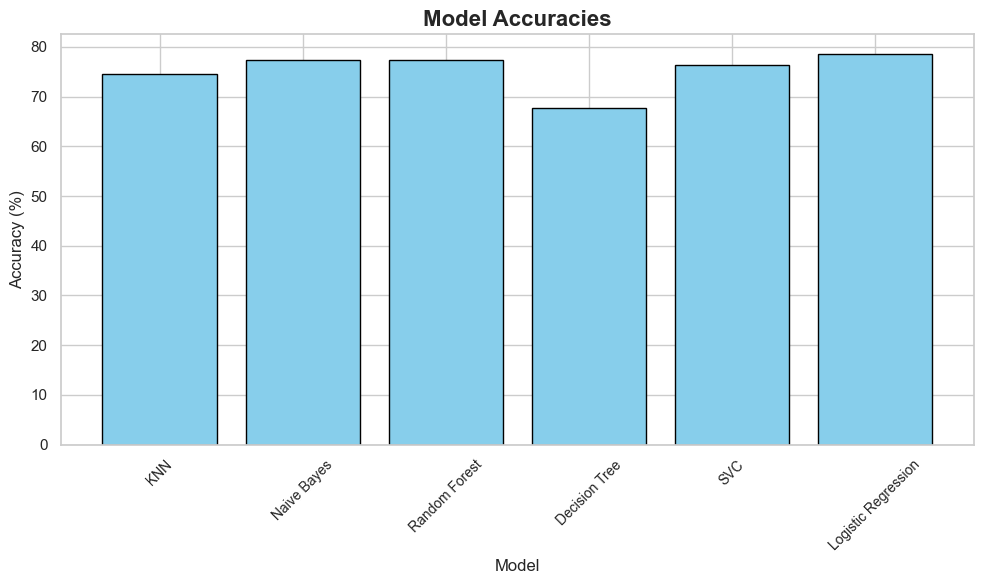

In [21]:
# Define the data for all models
model_results = pd.DataFrame({
    "Model": ["KNN", "Naive Bayes", "Random Forest", "Decision Tree", "SVC", "Logistic Regression"],
    "Accuracy (%)": [74.57, 77.46, 77.46, 67.63, 76.30, 78.61],
    "F1-score (Class 0)": [84.06, 86.22, 86.41, 78.95, 86.56, 87.29],
    "F1-score (Class 1)": [37.14, 38.10, 33.90, 30.00, 0.00, 32.73]
})

# Display the table
model_results_styled = model_results.style.format({
    "Accuracy (%)": "{:.2f}%",
    "F1-score (Class 0)": "{:.2f}%",
    "F1-score (Class 1)": "{:.2f}%"
}).set_table_attributes('style="width:70%; border-collapse:collapse; text-align:center;"').set_caption("Model Performance Metrics")

display(model_results_styled)

# Plot the accuracies for all models
plt.figure(figsize=(10, 6))
plt.bar(model_results["Model"], model_results["Accuracy (%)"], color='skyblue', edgecolor='black')
plt.title("Model Accuracies", fontsize=16, weight='bold')
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

### The plot shown is a line plot, where performance metrics (F1-score for class 0, F1-score for class 1, and accuracy) are compared across different machine learning models (e.g., LR, KNN, RF, SVC, NB). Each line represents the trend of a specific metric across the models.

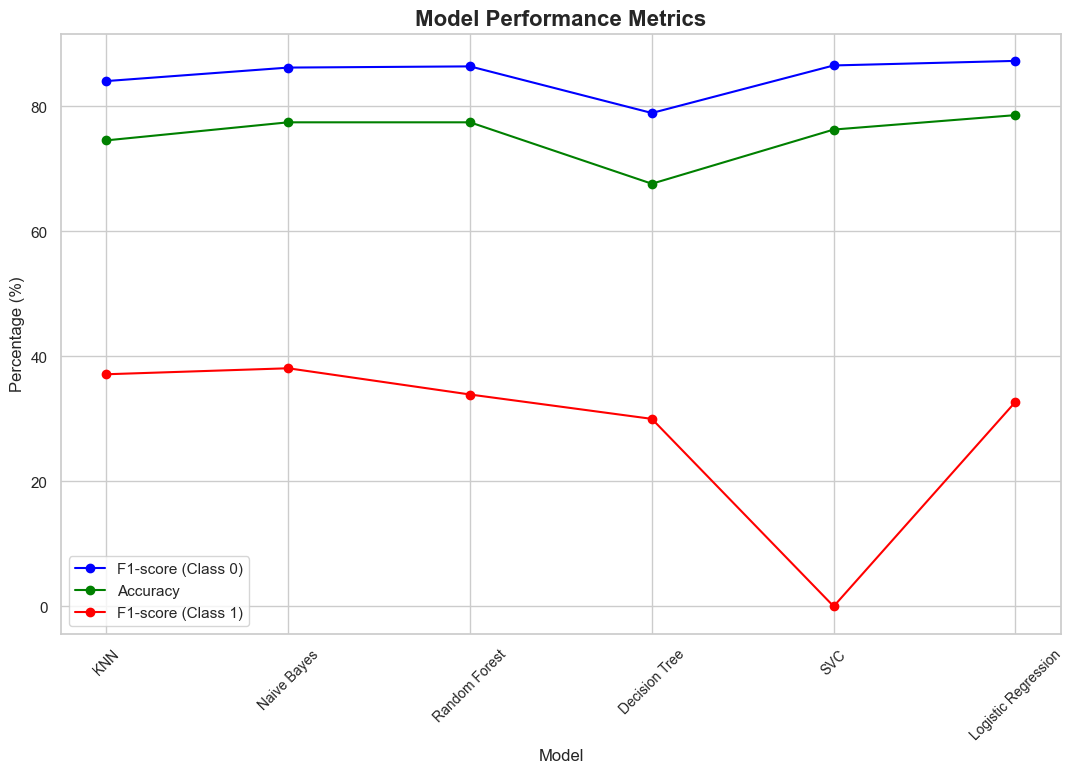

In [22]:
# Create the plot
fig = plt.figure(figsize=(10, 6), dpi=100)
ax = fig.add_axes([0, 0, 1, 1])

# Plot F1-score (Class 0), Accuracy, and F1-score (Class 1)
ax.plot(model_results["Model"], model_results['F1-score (Class 0)'], label="F1-score (Class 0)", marker='o', color='blue')
ax.plot(model_results["Model"], model_results['Accuracy (%)'], label="Accuracy", marker='o', color='green')
ax.plot(model_results["Model"], model_results['F1-score (Class 1)'], label="F1-score (Class 1)", marker='o', color='red')

# Add titles and labels
ax.set_title("Model Performance Metrics", fontsize=16, weight='bold')
ax.set_xlabel("Model", fontsize=12)
ax.set_ylabel("Percentage (%)", fontsize=12)

# Customize x-axis ticks
ax.set_xticks(range(len(model_results["Model"])))
ax.set_xticklabels(model_results["Model"], rotation=45, fontsize=10)

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


# Normalizing the values

In [23]:
from sklearn import preprocessing
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/chira/OneDrive/Desktop/Datamites Internship projects/Blood Donation Prediction/Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv')

# Initialize MinMaxScaler
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Apply scaling to the dataset
names = df.columns
d = scaler.fit_transform(df)
df_new = pd.DataFrame(d, columns=names)

# Display the first few rows of the normalized dataset
print(df_new.head())

   Unnamed: 0  Months since Last Donation  Number of Donations  \
0    0.828648                    0.027027             1.000000   
1    0.888889                    0.000000             0.244898   
2    0.590361                    0.013514             0.306122   
3    0.214190                    0.027027             0.387755   
4    0.479250                    0.013514             0.469388   

   Total Volume Donated (c.c.)  Months since First Donation  \
0                     1.000000                     1.000000   
1                     0.244898                     0.270833   
2                     0.306122                     0.343750   
3                     0.387755                     0.447917   
4                     0.469388                     0.781250   

   Made Donation in March 2007  
0                          1.0  
1                          1.0  
2                          1.0  
3                          1.0  
4                          0.0  


# Giving names to the headers

In [24]:
# Assign the specified column names to df_new
df_new.columns = [
    "Unnamed: 0", 
    "Months since Last Donation", 
    "Number of Donations", 
    "Total Volume Donated (c.c.)", 
    "Months since First Donation", 
    "Made Donation in March 2007"
]

In [25]:
df_new.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,0.828648,0.027027,1.000000,1.000000,1.000000,1.0
1,0.888889,0.000000,0.244898,0.244898,0.270833,1.0
2,0.590361,0.013514,0.306122,0.306122,0.343750,1.0
3,0.214190,0.027027,0.387755,0.387755,0.447917,1.0
4,0.479250,0.013514,0.469388,0.469388,0.781250,0.0


# Differentiating features and labels

In [26]:
X=df_new.iloc[:,1:-1]
y=df_new['Made Donation in March 2007']
X.head(2)

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,0.027027,1.000000,1.000000,1.000000
1,0.000000,0.244898,0.244898,0.270833


# Trying to balance the data using oversampling

In [27]:
class_count_0, class_count_1= df_new["Made Donation in March 2007"].value_counts()
class_count_0= df_new[df_new["Made Donation in March 2007"]==0]
class_count_1= df_new[df_new["Made Donation in March 2007"]==1]

In [28]:
Final_class_1 = class_count_1.sample(438,replace= True) 

In [29]:
over_sample_df=pd.concat([Final_class_1,class_count_0],axis=0)

In [30]:
X=over_sample_df.iloc[:,1:-1]
y=over_sample_df['Made Donation in March 2007']
y.tail(3)

573    0.0
574    0.0
575    0.0
Name: Made Donation in March 2007, dtype: float64

# Random Forest Classifier Modeling by using Grid search method

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model=RandomForestClassifier(
random_state=42,
n_estimators=40, #no. of trees to make
    max_depth=5
)
#Fitting the model
model.fit(X_train,y_train)
#Predicting
y_predict= model.predict(X_test)
accuracy_score(y_test,y_predict)

0.7745664739884393

# Confusion matrix for Random Forest Model

In [32]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Made Donation in March 2007,,
0,124,8
1,31,10


# Classification report for Random Forest Model

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86       155
           1       0.24      0.56      0.34        18

    accuracy                           0.77       173
   macro avg       0.59      0.68      0.60       173
weighted avg       0.87      0.77      0.81       173



# Grid search for Random Forest Model

In [34]:
from sklearn.model_selection import GridSearchCV

parameters={
'random_state':[10,13,15,16,20,25],
'n_estimators':[100,200,40,50,500,344], #no. of trees to make
'max_depth':[3,5,6,8,9,10,14]
}
grid_model=GridSearchCV(RandomForestClassifier(),parameters,verbose=2)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
[CV] END .....max_depth=3, n_estimators=100, random_state=10; total time=   0.0s
[CV] END .....max_depth=3, n_estimators=100, random_state=10; total time=   0.0s
[CV] END .....max_depth=3, n_estimators=100, random_state=10; total time=   0.0s
[CV] END .....max_depth=3, n_estimators=100, random_state=10; total time=   0.0s
[CV] END .....max_depth=3, n_estimators=100, random_state=10; total time=   0.0s
[CV] END .....max_depth=3, n_estimators=100, random_state=13; total time=   0.0s
[CV] END .....max_depth=3, n_estimators=100, random_state=13; total time=   0.0s
[CV] END .....max_depth=3, n_estimators=100, random_state=13; total time=   0.0s
[CV] END .....max_depth=3, n_estimators=100, random_state=13; total time=   0.0s
[CV] END .....max_depth=3, n_estimators=100, random_state=13; total time=   0.0s
[CV] END .....max_depth=3, n_estimators=100, random_state=15; total time=   0.0s
[CV] END .....max_depth=3, n_estimators=100, 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 6, 8, 9, 10, 14],
                         'n_estimators': [100, 200, 40, 50, 500, 344],
                         'random_state': [10, 13, 15, 16, 20, 25]},
             verbose=2)

# Got improved accuracy

In [35]:
grid_model.best_score_

0.7915432098765433

# Got best parameters for model

In [36]:
grid_model.best_params_ 

{'max_depth': 3, 'n_estimators': 40, 'random_state': 16}

# Prediction

In [37]:
y_predict=grid_model.predict(X_test)

# Confusion matrix after Grid search

In [38]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Made Donation in March 2007,,
0,124,8
1,30,11


# Classification report after Grid search

In [39]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       154
           1       0.27      0.58      0.37        19

    accuracy                           0.78       173
   macro avg       0.60      0.69      0.62       173
weighted avg       0.87      0.78      0.81       173



# Logistic regression model by using Grid search method

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Fitting the model
model.fit(X_train, y_train)

# Predicting
y_predict = model.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_predict)
accuracy


0.7861271676300579

# Confusion matrix for Logistic Regression Model

In [41]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Made Donation in March 2007,,
0,127,5
1,32,9


# Classification report for Logistic Regression Model

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87       159
           1       0.22      0.64      0.33        14

    accuracy                           0.79       173
   macro avg       0.59      0.72      0.60       173
weighted avg       0.90      0.79      0.83       173



# Grid Search for Logistic Regression Model

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for Logistic Regression
parameters = {
    'random_state': [10, 13, 15, 16, 20, 25],
    'C': [0.1, 1, 10, 100],  # Regularization strength (Inverse of regularization parameter)
    'solver': ['liblinear', 'saga'],  # Solvers for optimization
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Initialize GridSearchCV with Logistic Regression
Grid_model = GridSearchCV(LogisticRegression(), parameters, verbose=2)

# Fit the model
Grid_model.fit(X_train, y_train)

# Display the best parameters found by GridSearch
print("Best parameters found: ", Grid_model.best_params_)

# Use the best model from GridSearch
best_model = Grid_model.best_estimator_

# Predict on the test set
y_predict = best_model.predict(X_test)

# Compute and print the accuracy
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy of the best Logistic Regression model: {accuracy * 100:.2f}%")


Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END C=0.1, max_iter=100, random_state=10, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=100, random_state=10, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=100, random_state=10, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=100, random_state=10, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=100, random_state=10, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, random_state=10, solver=saga; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, random_state=10, solver=saga; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, random_state=10, solver=saga; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, random_state=10, solver=saga; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, random_state=10, solver=saga; total time=   0.0s
[CV] END C=0.1, max_iter=100, random_state=13, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=100

# Best model with improved accuracy till now

In [44]:
accuracy

0.791907514450867

# Display the best parameters found by GridSearch

In [45]:
print("Best parameters found: ", Grid_model.best_params_)

Best parameters found:  {'C': 0.1, 'max_iter': 100, 'random_state': 10, 'solver': 'liblinear'}


# Predict using the best model from GridSearchCV

In [46]:
y_predict = Grid_model.best_estimator_.predict(X_test)

# Confusion Metrics after performing Grid search for Logistic Regression model

In [47]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Made Donation in March 2007,,
0,128,4
1,32,9


# Classification report after performing Grid Search for Logistic Regression Model 

In [48]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       160
           1       0.22      0.69      0.33        13

    accuracy                           0.79       173
   macro avg       0.59      0.75      0.61       173
weighted avg       0.91      0.79      0.84       173



# Naive Bayes Model using Grid Search method

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize the Naive Bayes model
model = GaussianNB()

# Fitting the model
model.fit(X_train, y_train)

# Predicting
y_predict = model.predict(X_test)

# Compute the accuracy
Accuracy = accuracy_score(y_test, y_predict)
Accuracy


0.7745664739884393

# Confusion Metrics for Naives Bayes Model

In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pandas as pd

# Initialize and fit the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict on the test set
y_predict = model.predict(X_test)

# Generate a crosstab of actual vs predicted values
crosstab = pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])
print(crosstab)


Predicted    0   1
Actual            
0          121  11
1           28  13


# Classification Report for Naive Bayes Model

In [51]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.81      0.92      0.86       132
           1       0.54      0.32      0.40        41

    accuracy                           0.77       173
   macro avg       0.68      0.62      0.63       173
weighted avg       0.75      0.77      0.75       173



# Grid Search for Naive Bayes Model 

In [52]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Naive Bayes
parameters = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Variance smoothing values
}

# Initialize GridSearchCV with GaussianNB
grid_model = GridSearchCV(GaussianNB(), parameters, verbose=2)

# Fit the model
grid_model.fit(X_train, y_train)

# Display the best parameters found by GridSearch
print("Best parameters found: ", grid_model.best_params_)

# Predict using the best model from GridSearch
y_predict = grid_model.best_estimator_.predict(X_test)

# Evaluate the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy of the best Naive Bayes model: {accuracy * 100:.2f}%")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-07; total time=   0.0s
[CV] END ................................var_smoo

## So we can conclude that Logistic regression is giving the best model accuracy after grid search so that is the final model which suites best for predicting blood donation prediction

# Saving the Predictive Model Pickle file which will help to repeat blood donations amongst donors based on a limited number of attributes

In [53]:
import pickle
with open('C:/Users/chira/OneDrive/Desktop/Datamites Internship projects/Blood Donation Prediction/model.pkl', 'wb') as f:
    pickle.dump(grid_model,f)